# Certification Notebook 1 (DataClass) for 2D_FFT_Torch

In [1]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

# add parent directory to sys.path to import STL_2D_FFT_Torch class
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
from STL_2D_FFT_Torch import STL_2D_FFT_Torch as STLDataClass

In [2]:
# command to auto-reload modules when they are edited (easier for testing and debugging)
%load_ext autoreload
%autoreload 2

shape data = (256, 256)
shape data_full = (20, 256, 256)


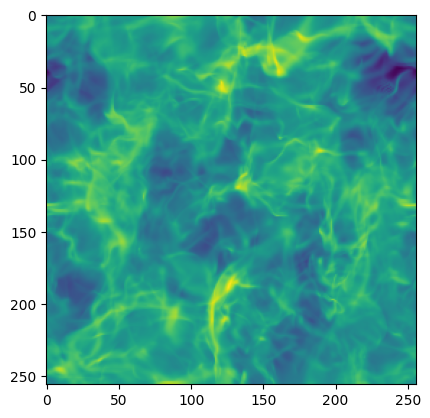

In [3]:
# Load some data and visualize it 
data_full = np.load("Turb_6.npy")
data = data_full[0] 

print("shape data = " + str(data.shape)) # (height, width)
print("shape data_full = " + str(data_full.shape)) # (N_images, height, width)

plt.imshow(data)

## Instanciating data

In [4]:
# test initilization of STL_2D_FFT_Torch class
stl_data_type_full = STLDataClass(array=data_full)
stl_data_type = STLDataClass(array=data)

In [5]:
print("Attributes of stl_data_type_full:\n")
for attr, value in stl_data_type_full.__dict__.items():
    print(attr, "=", value)
    print()

Attributes of stl_data_type_full:

array = tensor([[[20.1753, 20.1603, 20.1411,  ..., 20.1628, 20.1684, 20.1840],
         [20.1410, 20.1371, 20.1369,  ..., 20.1435, 20.1255, 20.1532],
         [20.1368, 20.1340, 20.1359,  ..., 20.1287, 20.1163, 20.1409],
         ...,
         [20.2385, 20.1890, 20.1470,  ..., 20.3206, 20.3140, 20.2882],
         [20.2286, 20.1976, 20.1556,  ..., 20.2404, 20.2510, 20.2498],
         [20.2046, 20.1793, 20.1461,  ..., 20.1950, 20.2152, 20.2231]],

        [[20.2139, 20.2218, 20.2298,  ..., 20.1676, 20.1856, 20.2012],
         [20.2164, 20.2211, 20.2248,  ..., 20.1771, 20.1929, 20.2067],
         [20.2289, 20.2256, 20.2285,  ..., 20.2074, 20.2212, 20.2288],
         ...,
         [20.2976, 20.3174, 20.3337,  ..., 20.2624, 20.2667, 20.2801],
         [20.2602, 20.2743, 20.2731,  ..., 20.2105, 20.2226, 20.2407],
         [20.2283, 20.2384, 20.2428,  ..., 20.1792, 20.1948, 20.2114]],

        [[20.5281, 20.4432, 20.3422,  ..., 20.3462, 20.3669, 20.4532],
  

In [6]:
print("Attributes of stl_data_type:\n")
for attr, value in stl_data_type.__dict__.items():
    print(attr, "=", value)
    print()

Attributes of stl_data_type:

array = tensor([[20.1753, 20.1603, 20.1411,  ..., 20.1628, 20.1684, 20.1840],
        [20.1410, 20.1371, 20.1369,  ..., 20.1435, 20.1255, 20.1532],
        [20.1368, 20.1340, 20.1359,  ..., 20.1287, 20.1163, 20.1409],
        ...,
        [20.2385, 20.1890, 20.1470,  ..., 20.3206, 20.3140, 20.2882],
        [20.2286, 20.1976, 20.1556,  ..., 20.2404, 20.2510, 20.2498],
        [20.2046, 20.1793, 20.1461,  ..., 20.1950, 20.2152, 20.2231]],
       dtype=torch.float64)

fourier_status = False

DT = 2D_FFT_Torch

MR = False

dg = 0

N0 = (256, 256)



## Downsampling

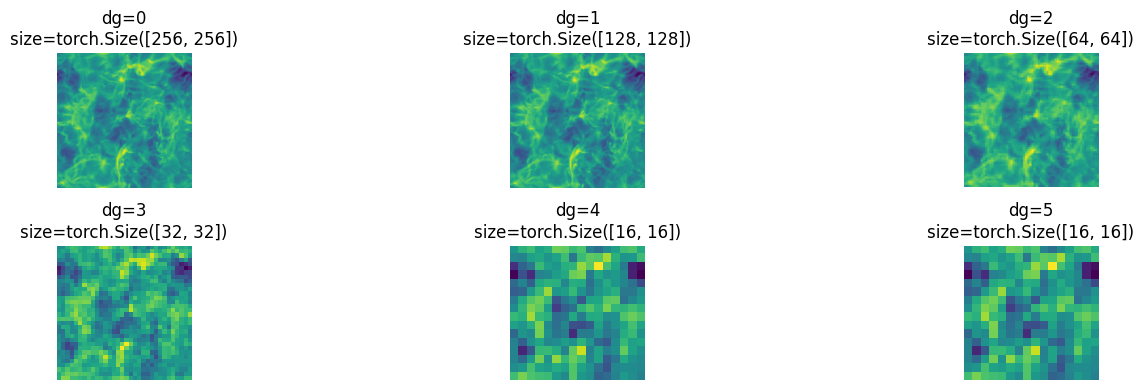

In [8]:
# Let's downsample some data and see if it works
# downsampling method is attached to the Wavelet Operator instances
from STL_2D_FFT_Torch import CrappyWavelateOperator2D_FFT_torch as WaveletOperatorClass

fig, axes = plt.subplots(2, 3, figsize=(16, 4))
axes = axes.flatten()

for dg, ax in enumerate(axes):

    # Subsample data
    stl_data_dg = WaveletOperatorClass.downsample(self=None,
                                                  data=stl_data_type, 
                                                  dg_out=dg, 
                                                  inplace=False,
                                                  target_fourier_status=False)

    ax.imshow(stl_data_dg.array.real)
    
    ax.set_title(f"dg={dg}\nsize={stl_data_dg.array.shape}")  
    ax.axis('off')

plt.tight_layout()
plt.show()

shape cropped data = torch.Size([115, 235])


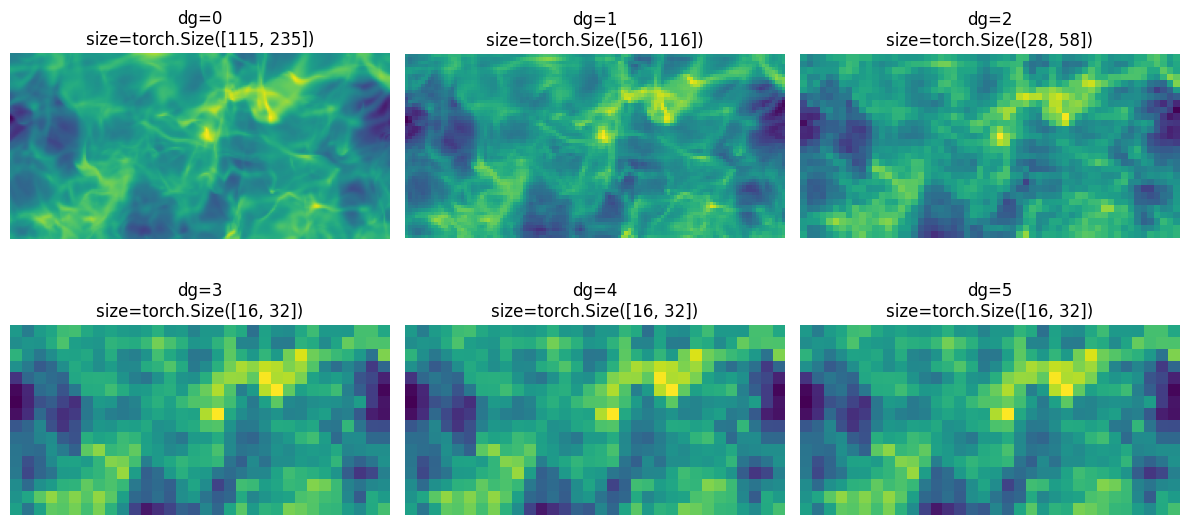

In [ ]:
# Let's test the same downsampling method with non regular sizes

stl_data_type_crop = STLDataClass(array=data[:115, :235])
print("shape cropped data = " + str(stl_data_type_crop.array.shape))

# Prepare plot
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.ravel()

# perform 8 downgrading and plot
for dg, ax in enumerate(axes):

    # Subsample data
    stl_data_crop_dg = WaveletOperatorClass.downsample(self=None,
                                                       data=stl_data_type_crop, 
                                                       dg_out=dg, 
                                                       inplace=False,
                                                       target_fourier_status=False)
    
    
    ax.imshow(stl_data_crop_dg.array.real)
    ax.set_title(f"dg={dg}\nsize={stl_data_crop_dg.array.shape}")  
    ax.axis('off')

plt.tight_layout()
plt.show()

# Same issue here as before.

In [11]:
# Let's check mean computation
mean = stl_data_type.mean()
print(mean)

tensor(20.3195, dtype=torch.float64)


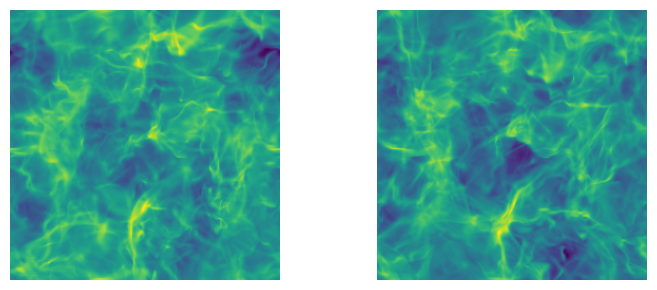

In [12]:
# Let's check covariance computation

# Prepare two data by first centering them
data1 = data_full[0]
data2 = data_full[1]
data1 = data1 - data1.mean()
data2 = data2 - data2.mean()
stl_data1 = STLDataClass(data1)
stl_data2 = STLDataClass(data2)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes = axes.ravel()
axes[0].imshow(stl_data1.array)
axes[0].axis('off')
axes[1].imshow(stl_data2.array)
axes[1].axis('off')
plt.tight_layout()
plt.show()

In [13]:
# Test of covariance and auto-covariance in real space
print("Data1 Fourier status is : " + str(stl_data1.fourier_status))
print("Data2 Fourier status is : " + str(stl_data2.fourier_status))
cov = STLDataClass.covariance(stl_data1.array, stl_data1.fourier_status, stl_data2.array, stl_data2.fourier_status)
print("Covariance in real space = " + str(cov))
cov = STLDataClass.covariance(stl_data1.array, stl_data1.fourier_status, stl_data1.array, stl_data1.fourier_status)
print("Auto-Covariance in real space = " + str(cov))

Data1 Fourier status is : False
Data2 Fourier status is : False
Covariance in real space = tensor(0.0247, dtype=torch.float64)
Auto-Covariance in real space = tensor(0.0641, dtype=torch.float64)


In [14]:
# Test of covariance if one data is in Fourier space
stl_data1 = stl_data1.set_fourier_status(target_fourier_status=True, inplace=True)

print("Data1 Fourier status is : " + str(stl_data1.fourier_status))
print("Data2 Fourier status is : " + str(stl_data2.fourier_status))
cov = STLDataClass.covariance(stl_data1.array, stl_data1.fourier_status, stl_data2.array, stl_data2.fourier_status)
print("Covariance in dual space = " + str(cov))

# It has the same covariance as before ! (fourier, inverse fourier and cov static method have been successfully tested)

Data1 Fourier status is : True
Data2 Fourier status is : False
Covariance in dual space = tensor(0.0247-7.5675e-19j, dtype=torch.complex128)
